In [1]:
import json

# 파일 경로
file_path = 'conv_senti.json'

# JSON 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 데이터 확인
# print(data.keys())
# print(data['sample_key'])  # 데이터의 키와 일부 값을 출력하여 
print(data[0])


{'profile': {'persona-id': 'Pro_05349', 'persona': {'persona-id': 'A02_G02_C01', 'human': ['A02', 'G02'], 'computer': ['C01']}, 'emotion': {'emotion-id': 'S06_D02_E18', 'type': 'E18', 'situation': ['S06', 'D02']}}, 'talk': {'id': {'profile-id': 'Pro_05349', 'talk-id': 'Pro_05349_00053'}, 'content': {'HS01': '일은 왜 해도 해도 끝이 없을까? 화가 난다.', 'SS01': '많이 힘드시겠어요. 주위에 의논할 상대가 있나요?', 'HS02': '그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.', 'SS02': '혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요. ', 'HS03': '', 'SS03': ''}}}


# EDA

1. JSON 데이터를 pandas DataFrame으로 변환.  
2. 데이터의 기본 통계 정보 및 데이터 타입을 확인.  
3. 결측치 확인.  
4. 텍스트 길이 분석.  
5. 유니크 값 확인.  
6. 상황(situation) 및 감정(emotion) 데이터 분석.  
7. 결과를 시각적으로 표현.  

In [2]:
import pandas as pd

records = []

# JSON 데이터를 pandas DataFrame으로 변환
for record in data:
    profile = record.get('profile', {})
    persona = profile.get('persona', {})
    emotion = profile.get('emotion', {})
    talk = record.get('talk', {})
    talk_id = talk.get('id', {})
    content = talk.get('content', {})
    
    record_dict = {
        'profile_id': profile.get('persona-id', ''),
        'talk_id': talk_id.get('talk-id', ''),
        'persona_id': persona.get('persona-id', ''),
        'human': ', '.join(persona.get('human', [])),  # 리스트를 문자열로 변환
        'computer': ', '.join(persona.get('computer', [])),  # 리스트를 문자열로 변환
        'emotion_id': emotion.get('emotion-id', ''),
        'emotion_type': emotion.get('type', ''),
        'situation': ', '.join(emotion.get('situation', [])),  # 리스트를 문자열로 변환
        'HS01': content.get('HS01', ''),
        'SS01': content.get('SS01', ''),
        'HS02': content.get('HS02', ''),
        'SS02': content.get('SS02', ''),
        'HS03': content.get('HS03', ''),
        'SS03': content.get('SS03', '')
    }
    records.append(record_dict)

df = pd.DataFrame(records)

# 데이터 프레임 확인
print(df.head())


  profile_id          talk_id   persona_id     human computer   emotion_id  \
0  Pro_05349  Pro_05349_00053  A02_G02_C01  A02, G02      C01  S06_D02_E18   
1  Pro_05349  Pro_05349_00049  A02_G02_C01  A02, G02      C01  S06_D02_E18   
2  Pro_05349  Pro_05349_00077  A02_G02_C01  A02, G02      C01  S06_D02_E18   
3  Pro_05349  Pro_05349_00064  A02_G02_C01  A02, G02      C01  S06_D02_E18   
4  Pro_05349  Pro_05349_00039  A02_G02_C01  A02, G02      C01  S06_D02_E18   

  emotion_type situation                                               HS01  \
0          E18  S06, D02                          일은 왜 해도 해도 끝이 없을까? 화가 난다.   
1          E18  S06, D02     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.   
2          E18  S06, D02  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...   
3          E18  S06, D02  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...   
4          E18  S06, D02              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.   

                                                SS01  \


In [3]:
# 기본 통계 정보 확인
print(df.describe(include='all'))

       profile_id          talk_id   persona_id     human computer  \
count       51628            51628        51628     51628    51628   
unique       1919            51625            8         8        1   
top     Pro_05368  Pro_12151_00004  A02_G02_C01  A02, G02      C01   
freq           97                2         8746      8746    51628   

         emotion_id emotion_type situation        HS01                SS01  \
count         51628        51628     51628       51628               51628   
unique          900           60        15       51600               50352   
top     S04_D02_E11          E37  S04, D02  요즘 너무 힘들어.  조금 더 자세히 말씀해주시겠어요?   
freq            246         1229      8953           5                  55   

                  HS02                         SS02   HS03   SS03  
count            51628                        51628  51628  51628  
unique           50831                        47875  42295  41452  
top     대인관계가 원만하지 않아.  이 상황에서 할 수 있는 게 어떤 것이 있을까요?   

In [4]:
# 데이터 타입 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51628 entries, 0 to 51627
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   profile_id    51628 non-null  object
 1   talk_id       51628 non-null  object
 2   persona_id    51628 non-null  object
 3   human         51628 non-null  object
 4   computer      51628 non-null  object
 5   emotion_id    51628 non-null  object
 6   emotion_type  51628 non-null  object
 7   situation     51628 non-null  object
 8   HS01          51628 non-null  object
 9   SS01          51628 non-null  object
 10  HS02          51628 non-null  object
 11  SS02          51628 non-null  object
 12  HS03          51628 non-null  object
 13  SS03          51628 non-null  object
dtypes: object(14)
memory usage: 5.5+ MB
None


In [5]:
# 결측치 확인
print(df.isnull().sum())

profile_id      0
talk_id         0
persona_id      0
human           0
computer        0
emotion_id      0
emotion_type    0
situation       0
HS01            0
SS01            0
HS02            0
SS02            0
HS03            0
SS03            0
dtype: int64


In [6]:
# 텍스트 길이 분석
df['HS01_length'] = df['HS01'].apply(len)
df['SS01_length'] = df['SS01'].apply(len)
df['HS02_length'] = df['HS02'].apply(len)
df['SS02_length'] = df['SS02'].apply(len)
df['HS03_length'] = df['HS03'].apply(len)
df['SS03_length'] = df['SS03'].apply(len)

print(df[['HS01_length', 'SS01_length', 'HS02_length', 'SS02_length', 'HS03_length', 'SS03_length']].describe())

        HS01_length   SS01_length   HS02_length   SS02_length   HS03_length  \
count  51628.000000  51628.000000  51628.000000  51628.000000  51628.000000   
mean      35.200783     27.519931     36.856260     31.291780     27.705547   
std       11.867959      9.564532     12.160479     11.051095     16.650248   
min        5.000000      7.000000      6.000000      7.000000      0.000000   
25%       27.000000     21.000000     28.000000     24.000000     19.000000   
50%       35.000000     26.000000     36.000000     29.000000     29.000000   
75%       44.000000     33.000000     44.000000     38.000000     39.000000   
max      156.000000     95.000000    137.000000    151.000000    126.000000   

        SS03_length  
count  51628.000000  
mean      22.883842  
std       13.496884  
min        0.000000  
25%       18.000000  
50%       25.000000  
75%       31.000000  
max      887.000000  


In [7]:
# 텍스트 데이터의 유니크 값 확인
for column in ['HS01', 'SS01', 'HS02', 'SS02', 'HS03', 'SS03']:
    print(f'Unique values in {column}:')
    print(df[column].value_counts())
    print()

Unique values in HS01:
HS01
요즘 너무 힘들어.                                           5
나 지금 너무 비관적이야.                                       4
너무 외롭다.                                              3
나 요즘 너무 힘들어.                                         2
너무 힘들고 무서워.                                          2
                                                    ..
운동 삼아 게이트볼을 시작했는데 비싼 장비로 열을 올리는 애들이 있더라. 답답해.        1
친구 자식은 벌써 출세했다기에 당황스러워서 아들에게 전화로 잔소리 좀 했어.           1
내 친구가 자원 봉사를 하도 다니길래 착한 척하지 말라고 했어. 걔는 정말 별로야.       1
너무 지루해. 매일 매일이 똑같은 요양원이 너무 싫어.                       1
남편과 결혼한 지 사십 년이야. 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져.    1
Name: count, Length: 51600, dtype: int64

Unique values in SS01:


SS01
조금 더 자세히 말씀해주시겠어요?                 55
조금 더 자세히 말씀해 주시겠어요?                35
좀 더 자세히 말씀해주시겠어요?                  35
무슨 일이 있으셨나요?                       32
조금 더 자세하게 말씀해주시겠어요?                24
                                   ..
현실적으로 도움이 되지 못해 속상하시겠어요.            1
자식에게 재산을 물려주지 못해 마음이 안 좋겠어요.        1
집에 도둑이 들다니 놀라셨겠어요.                  1
형편이 좋지 않아 걱정이시겠어요.                  1
대인관계에 대한 어려움 때문에 걱정되시고 속상하시겠어요.     1
Name: count, Length: 50352, dtype: int64

Unique values in HS02:
HS02
대인관계가 원만하지 않아.                            4
갑자기 큰돈이 필요하게 되었어.                         3
법적 대응을 할까 고민 중이야. 어디서 정보를 얻어야 할지 모르겠어.    3
내 건강도 좋은 편은 아닌데 금방 세상을 떠날까 걱정이야.          3
가게에 돈도 많이 들었는데 은근 착잡한 기분도 많이 들어.          3
                                         ..
사실 내가 병원비 얘기를 꺼냈어.                        1
난 그 돈이 꼭 필요해.                             1
그래서 간호사들이 보험에 대해 알려줬는데 난 아는 게 없어.         1
당뇨병에 합병증까지 해서 치료비가 걱정이야.                  1
사람들을 만나는 것이 어려워. 자꾸 사람들을 의심하게만 되고 말이야.    1
Name: count, Length: 50

In [8]:
# 상황(situation) 데이터 분석
situation_data = df['situation'].str.split(', ').explode()
situation_counts = situation_data.value_counts()
print(situation_counts)

situation
D02    46310
S04    10926
D01     5318
S06     5223
S13     4962
S11     4222
S01     4207
S05     4085
S07     3402
S02     3283
S03     3091
S09     3022
S08     2738
S10     2467
Name: count, dtype: int64


In [9]:
# 감정(emotion) 데이터 분석
emotion_counts = df['emotion_type'].value_counts()
print(emotion_counts)

emotion_type
E37    1229
E13    1054
E24    1002
E27     993
E31     991
E47     984
E18     975
E32     971
E19     969
E20     958
E10     958
E48     953
E22     950
E45     949
E40     937
E11     926
E58     918
E42     911
E44     910
E23     906
E34     901
E43     901
E51     900
E39     899
E56     897
E41     896
E28     896
E30     893
E29     884
E55     883
E17     882
E12     875
E16     873
E52     872
E21     870
E59     870
E38     869
E53     865
E33     864
E49     861
E36     860
E50     859
E54     859
E15     845
E35     842
E46     840
E25     838
E57     833
E26     828
E14     803
E60     660
E64     655
E67     639
E68     634
E61     631
E62     609
E63     597
E69     570
E66     568
E65     563
Name: count, dtype: int64


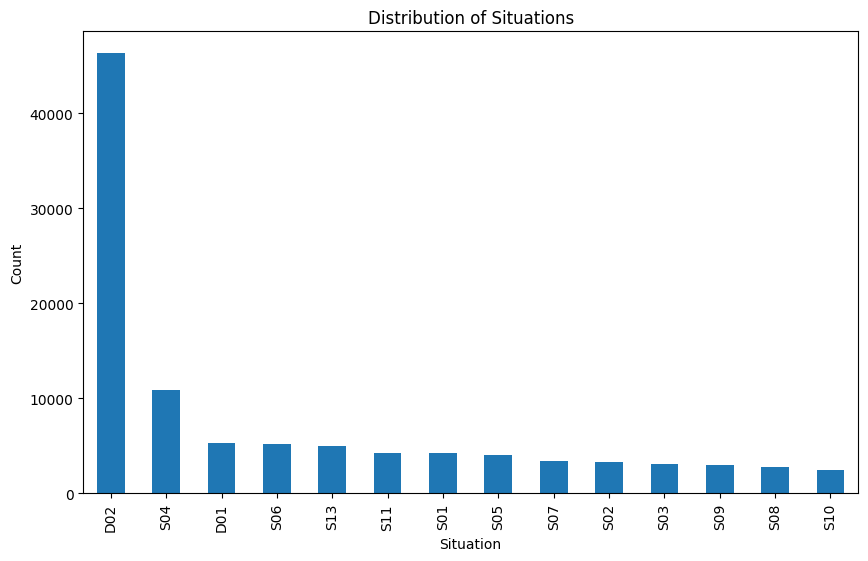

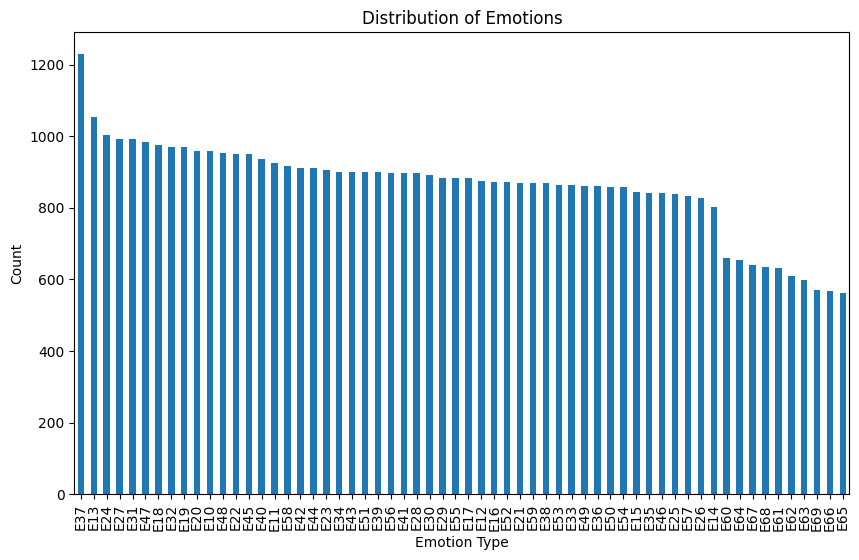

<Figure size 1000x600 with 0 Axes>

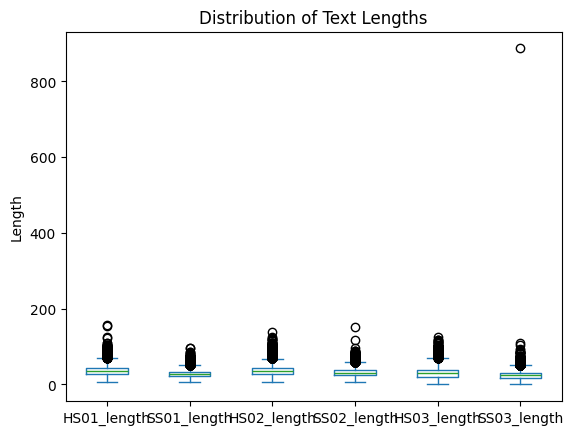

In [10]:
# 결과를 시각적으로 표현
import matplotlib.pyplot as plt

# 상황(situation) 데이터 시각화
plt.figure(figsize=(10, 6))
situation_counts.plot(kind='bar')
plt.title('Distribution of Situations')
plt.xlabel('Situation')
plt.ylabel('Count')
plt.show()

# 감정(emotion) 데이터 시각화
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion Type')
plt.ylabel('Count')
plt.show()

# 텍스트 길이 시각화
plt.figure(figsize=(10, 6))
df[['HS01_length', 'SS01_length', 'HS02_length', 'SS02_length', 'HS03_length', 'SS03_length']].plot(kind='box')
plt.title('Distribution of Text Lengths')
plt.ylabel('Length')
plt.show()

# 발화랑 emtion id만 전처리

In [11]:
import pandas as pd
import json

# Load the JSON file
file_path = 'conv_senti.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract relevant information
rows = []
for entry in data:
    profile = entry['profile']
    talk_content = entry['talk']['content']
    emotion = profile['emotion']
    
    row = {
        'emotion_type': emotion['type'],
        'HS01': talk_content.get('HS01', ''),
        'HS02': talk_content.get('HS02', ''),
        'HS03': talk_content.get('HS03', '')
    }
    rows.append(row)

# Create DataFrame
df = pd.DataFrame(rows)
df.head()


,emotion_type,HS01,HS02,HS03
0,E18,일은 왜 해도 해도 끝이 없을까? 화가 난다.,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,
1,E18,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,
2,E18,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,
3,E18,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,
4,E18,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,


### df를 csv로 저장

In [12]:
csv_file_path = "conv_senti_emotion_hs.csv"
df.to_csv(csv_file_path, index=False)

### id2label 가이드 보고 dictionary화

In [13]:
id2label_cleaned = {
    10: "분노",
    11: "툴툴대는",
    12: "좌절한",
    13: "짜증내는",
    14: "방어적인",
    15: "악의적인",
    16: "안달하는",
    17: "구역질 나는",
    18: "노여워하는",
    19: "성가신",
    20: "슬픔",
    21: "실망한",
    22: "비통한",
    23: "후회되는",
    24: "우울한",
    25: "마비된",
    26: "염세적인",
    27: "눈물이 나는",
    28: "낙담한",
    29: "환멸을 느끼는",
    30: "불안",
    31: "두려운",
    32: "스트레스 받는",
    33: "취약한",
    34: "혼란스러운",
    35: "당혹스러운",
    36: "회의적인",
    37: "걱정스러운",
    38: "조심스러운",
    39: "초조한",
    40: "상처",
    41: "질투하는",
    42: "배신당한",
    43: "고립된",
    44: "충격 받은",
    45: "가난한, 불우한",
    46: "희생된",
    47: "억울한",
    48: "괴로워하는",
    49: "버려진",
    50: "당황",
    51: "고립된(당황한)",
    52: "남의 시선을 의식하는",
    53: "외로운",
    54: "열등감",
    55: "죄책감",
    56: "부끄러운",
    57: "혐오스러운",
    58: "한심한",
    59: "혼란스러운(당황한)",
    60: "기쁨",
    61: "감사하는",
    62: "신뢰하는",
    63: "편안한",
    64: "만족스러운",
    65: "흥분",
    66: "느긋",
    67: "안도",
    68: "신이 난",
    69: "자신하는"
}

# Emotion count EDA

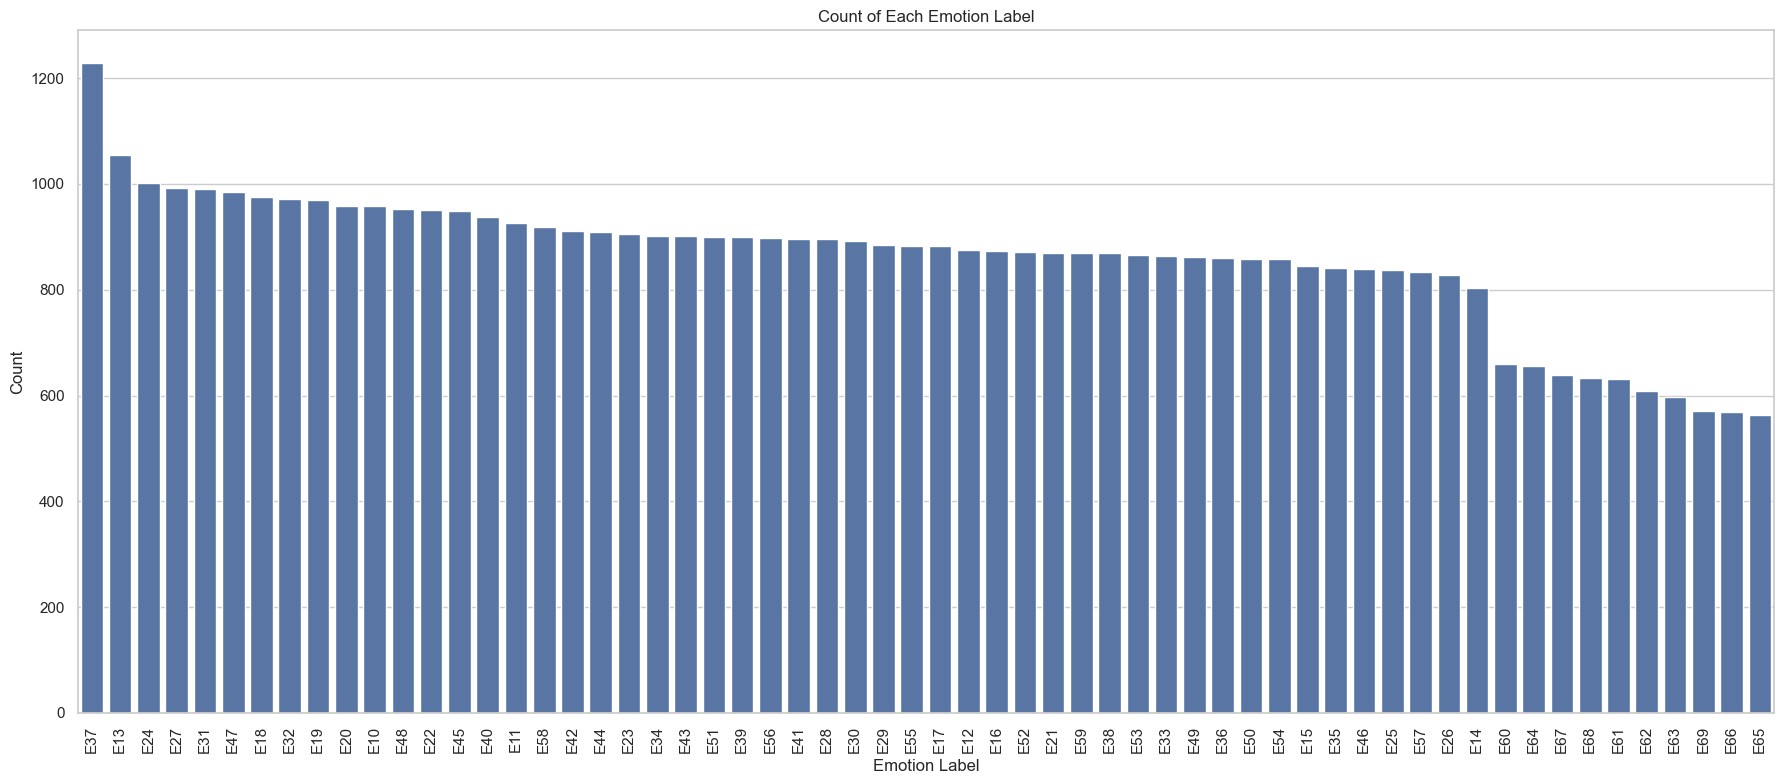

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'conv_senti_emotion_hs.csv'

# 파일을 읽어 DataFrame으로 변환
data = pd.read_csv(file_path)

# 각 감정 레이블의 빈도 계산
emotion_counts = data['emotion_type'].value_counts()

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 감정 레이블별 데이터 빈도를 바 차트로 표시
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='emotion_type', data=data, order=emotion_counts.index)
ax.set_title('Count of Each Emotion Label')
ax.set_xlabel('Emotion Label')
ax.set_ylabel('Count')
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()


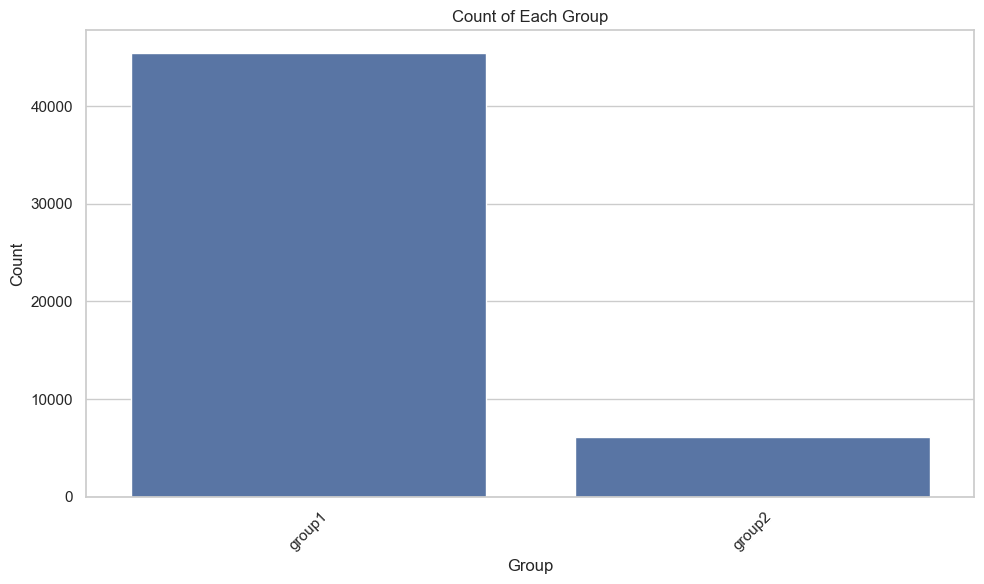

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = 'conv_senti_emotion_hs.csv'

# 파일을 읽어 DataFrame으로 변환
data = pd.read_csv(file_path)

# 그룹 분류
data['group'] = data['emotion_type'].apply(lambda x: 'group2' if x.startswith('E6') else 'group1')

# 각 그룹별 빈도 계산
group_counts = data['group'].value_counts()

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그룹별 데이터 빈도를 바 차트로 표시
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=group_counts.index, y=group_counts.values)
ax.set_title('Count of Each Group')
ax.set_xlabel('Group')
ax.set_ylabel('Count')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()


# HS01, HS02, HS03 HS열로해서 데이터 나누기

In [1]:
import pandas as pd

# 파일 경로 설정
file_path = 'conv_senti_emotion_hs.csv'

# 파일을 읽어 DataFrame으로 변환
data = pd.read_csv(file_path)

# 'HS01', 'HS02', 'HS03' 열을 개별 행으로 전환하고, 'emotion_type' 열은 유지
long_format = pd.melt(data, id_vars=['emotion_type'], value_vars=['HS01', 'HS02', 'HS03'], var_name='HS_label', value_name='hs')

# 필요 없는 'HS_label' 열을 삭제하고, 결과 DataFrame 재구성
long_format = long_format.drop('HS_label', axis=1)

# 결과 확인
print(long_format.head())


  emotion_type                                                 hs
0          E18                          일은 왜 해도 해도 끝이 없을까? 화가 난다.
1          E18     이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.
2          E18  회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...
3          E18  직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...
4          E18              얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.


# 결측치 확인

In [2]:
# Count the frequency of each emotion type to analyze the distribution
emotion_type_distribution = long_format['emotion_type'].value_counts()

# Checking for missing values in 'HS' column
missing_hs = long_format['hs'].isnull().sum()

print(emotion_type_distribution, "\n", missing_hs)


emotion_type
E37    3687
E13    3162
E24    3006
E27    2979
E31    2973
E47    2952
E18    2925
E32    2913
E19    2907
E20    2874
E10    2874
E48    2859
E22    2850
E45    2847
E40    2811
E11    2778
E58    2754
E42    2733
E44    2730
E23    2718
E34    2703
E43    2703
E51    2700
E39    2697
E56    2691
E41    2688
E28    2688
E30    2679
E29    2652
E55    2649
E17    2646
E12    2625
E16    2619
E52    2616
E21    2610
E59    2610
E38    2607
E53    2595
E33    2592
E49    2583
E36    2580
E50    2577
E54    2577
E15    2535
E35    2526
E46    2520
E25    2514
E57    2499
E26    2484
E14    2409
E60    1980
E64    1965
E67    1917
E68    1902
E61    1893
E62    1827
E63    1791
E69    1710
E66    1704
E65    1689
Name: count, dtype: int64 
 8935


In [3]:
long_format = long_format.dropna(subset=['hs'])

# 결과 확인
print(long_format["hs"].isnull().sum())

0


## E제거 -> 모델 학습시 id에 str 안됨

In [4]:
# Remove 'E' and convert the emotion_type IDs to integers
long_format['emotion_type'] = long_format['emotion_type'].apply(lambda x: int(x[1:]))
# 'emotion_type'의 ID 값을 10씩 빼서 새로운 범위로 조정
long_format['emotion_type'] = long_format['emotion_type'].apply(lambda x: x - 10)
long_format['labels'] = long_format['emotion_type']
long_format = long_format.drop(columns=['emotion_type'])
long_format.head()


,hs,labels
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,8
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,8
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,8
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,8
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,8


In [5]:
csv_file_path = "train_dataset.csv"
long_format.to_csv(csv_file_path, index=False)